Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<Container object of 3 artists>

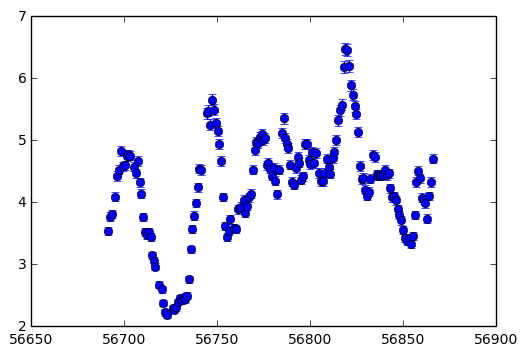

In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import lognorm
import sys
import getopt
sys.path.insert(1,"/usr/local/science/clag/")
import clag
%pylab inline

ref_file="lc/1367A.lc"
echo_file="lc/2246A.lc"


dt = 0.01
t1, l1, l1e = np.loadtxt(ref_file).T
errorbar(t1, l1, yerr=l1e, fmt='o')

In [2]:


fqL = np.array([0.0049999999, 0.018619375, 0.044733049, 0.069336227, 0.10747115, 0.16658029, 
                0.25819945, 0.40020915, 0.62032418])
# fqL = np.logspace(np.log10(0.0006),np.log10(1.2),11)
nfq = len(fqL) - 1
fqd = 10**(np.log10( (fqL[:-1]*fqL[1:]) )/2.)


fqL




array([ 0.005     ,  0.01861938,  0.04473305,  0.06933623,  0.10747115,
        0.16658029,  0.25819945,  0.40020915,  0.62032418])

In [3]:
P1 = clag.clag('psd10r', [t1], [l1], [l1e], dt, fqL)
p1 = np.ones(nfq)
p1, p1e = clag.optimize(P1, p1)

   1 4.342e-01 5.077e+01 inf -- -5.530e+02 -- 1 1 1 1 1 1 1 1
   2 7.674e-01 5.065e+01 8.300e+01 -- -4.700e+02 -- 0.653018 0.587019 0.568277 0.567457 0.566281 0.566085 0.565773 0.566163
   3 3.298e+00 5.043e+01 8.075e+01 -- -3.893e+02 -- 0.414806 0.209135 0.141159 0.13784 0.133393 0.132728 0.131612 0.132761
   4 1.572e+00 5.010e+01 7.754e+01 -- -3.117e+02 -- 0.322539 -0.0834456 -0.273066 -0.284295 -0.297612 -0.299435 -0.302479 -0.300412
   5 5.908e-01 4.964e+01 7.386e+01 -- -2.379e+02 -- 0.302357 -0.214604 -0.654658 -0.688754 -0.723838 -0.729279 -0.736418 -0.733888
   6 3.713e-01 4.877e+01 6.953e+01 -- -1.683e+02 -- 0.284419 -0.200357 -0.96379 -1.05472 -1.13798 -1.15477 -1.17031 -1.16748
   7 2.709e-01 4.671e+01 6.269e+01 -- -1.056e+02 -- 0.277768 -0.185001 -1.13047 -1.34026 -1.52128 -1.56845 -1.6043 -1.60101
   8 2.135e-01 4.361e+01 5.281e+01 -- -5.282e+01 -- 0.277012 -0.185189 -1.16375 -1.49463 -1.83211 -1.9477 -2.03737 -2.03476
   9 1.764e-01 3.767e+01 4.019e+01 -- -1.264e+01 -- 0.2

In [4]:
p1, p1e = clag.errors(P1, p1, p1e)

	### errors for param 0 ###
+++ 3.525e+01 3.480e+01 3.006e-01 5.395e-01 0.891 +++
+++ 3.525e+01 3.431e+01 3.006e-01 6.590e-01 1.87 +++
+++ 3.525e+01 3.458e+01 3.006e-01 5.993e-01 1.34 +++
+++ 3.525e+01 3.469e+01 3.006e-01 5.694e-01 1.11 +++
+++ 3.525e+01 3.475e+01 3.006e-01 5.545e-01 0.997 +++
	### errors for param 1 ###
+++ 3.525e+01 3.476e+01 -1.781e-01 2.430e-02 0.973 +++
+++ 3.525e+01 3.421e+01 -1.781e-01 1.255e-01 2.07 +++
+++ 3.525e+01 3.451e+01 -1.781e-01 7.491e-02 1.48 +++
+++ 3.525e+01 3.464e+01 -1.781e-01 4.961e-02 1.21 +++
+++ 3.525e+01 3.470e+01 -1.781e-01 3.696e-02 1.09 +++
+++ 3.525e+01 3.473e+01 -1.781e-01 3.063e-02 1.03 +++
+++ 3.525e+01 3.475e+01 -1.781e-01 2.747e-02   1 +++
	### errors for param 2 ###
+++ 3.525e+01 3.511e+01 -1.191e+00 -1.074e+00 0.276 +++
+++ 3.525e+01 3.495e+01 -1.191e+00 -1.016e+00 0.598 +++
+++ 3.525e+01 3.485e+01 -1.191e+00 -9.870e-01 0.8 +++
+++ 3.525e+01 3.479e+01 -1.191e+00 -9.725e-01 0.91 +++
+++ 3.525e+01 3.476e+01 -1.191e+00 -9.652e-01 0.96

<Container object of 3 artists>

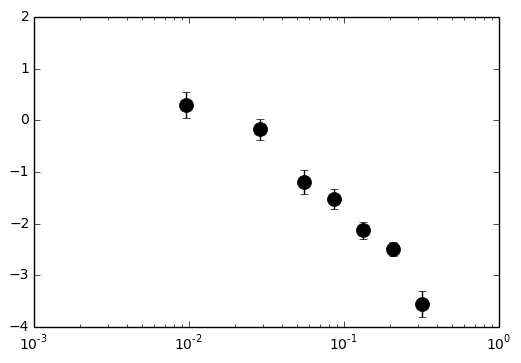

In [5]:
xscale('log'); ylim(-4,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="black")


<Container object of 3 artists>

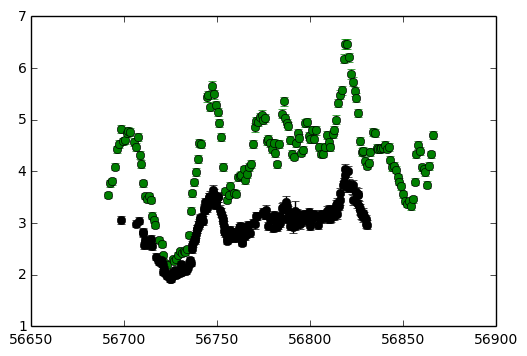

In [6]:
t2, l2, l2e = np.loadtxt(echo_file).T
errorbar(t1, l1, yerr=l1e, fmt='o', color="green")
errorbar(t2, l2, yerr=l2e, fmt='o', color="black")

In [7]:
P2 = clag.clag('psd10r', [t2], [l2], [l2e], dt, fqL)
p2 = np.ones(nfq)
p2, p2e = clag.optimize(P2, p2)

   1 4.379e-01 6.748e+01 inf -- -3.302e+02 -- 1 1 1 1 1 1 1 1
   2 7.796e-01 6.679e+01 7.758e+01 -- -2.526e+02 -- 0.618991 0.579498 0.564066 0.564121 0.56476 0.563682 0.563867 0.56205
   3 3.540e+00 6.595e+01 7.576e+01 -- -1.769e+02 -- 0.314779 0.183356 0.127531 0.127909 0.129377 0.127333 0.127748 0.123875
   4 1.452e+00 6.481e+01 7.321e+01 -- -1.036e+02 -- 0.145822 -0.154058 -0.309225 -0.308235 -0.306082 -0.309022 -0.308575 -0.314603
   5 5.873e-01 6.313e+01 7.037e+01 -- -3.327e+01 -- 0.101594 -0.377738 -0.742409 -0.742747 -0.740971 -0.745083 -0.745333 -0.753741
   6 3.716e-01 6.044e+01 6.710e+01 -- 3.383e+01 -- 0.0846307 -0.469976 -1.15278 -1.17038 -1.1732 -1.18022 -1.18308 -1.19385
   7 3.359e-01 5.601e+01 6.209e+01 -- 9.591e+01 -- 0.0659456 -0.50867 -1.48798 -1.574 -1.5971 -1.61323 -1.62275 -1.63479
   8 5.149e-01 4.857e+01 5.399e+01 -- 1.499e+02 -- 0.0437973 -0.538092 -1.68322 -1.90776 -2.00001 -2.04069 -2.06646 -2.07709
   9 7.563e-01 3.652e+01 4.228e+01 -- 1.922e+02 -- 0.0212475

In [8]:
p2, p2e = clag.errors(P2, p2, p2e)

	### errors for param 0 ###
+++ 2.371e+02 2.366e+02 -1.305e-02 2.561e-01 0.96 +++
+++ 2.371e+02 2.361e+02 -1.305e-02 3.907e-01   2 +++
+++ 2.371e+02 2.364e+02 -1.305e-02 3.234e-01 1.44 +++
+++ 2.371e+02 2.365e+02 -1.305e-02 2.898e-01 1.19 +++
+++ 2.371e+02 2.365e+02 -1.305e-02 2.729e-01 1.07 +++
+++ 2.371e+02 2.366e+02 -1.305e-02 2.645e-01 1.02 +++
+++ 2.371e+02 2.366e+02 -1.305e-02 2.603e-01 0.987 +++
+++ 2.371e+02 2.366e+02 -1.305e-02 2.624e-01   1 +++
	### errors for param 1 ###
+++ 2.371e+02 2.366e+02 -5.854e-01 -3.529e-01 0.949 +++
+++ 2.371e+02 2.361e+02 -5.854e-01 -2.367e-01 1.99 +++
+++ 2.371e+02 2.364e+02 -5.854e-01 -2.948e-01 1.43 +++
+++ 2.371e+02 2.365e+02 -5.854e-01 -3.239e-01 1.18 +++
+++ 2.371e+02 2.365e+02 -5.854e-01 -3.384e-01 1.06 +++
+++ 2.371e+02 2.366e+02 -5.854e-01 -3.457e-01   1 +++
	### errors for param 2 ###
+++ 2.371e+02 2.369e+02 -1.838e+00 -1.686e+00 0.273 +++
+++ 2.371e+02 2.368e+02 -1.838e+00 -1.610e+00 0.6 +++
+++ 2.371e+02 2.367e+02 -1.838e+00 -1.572e+00

<Container object of 3 artists>

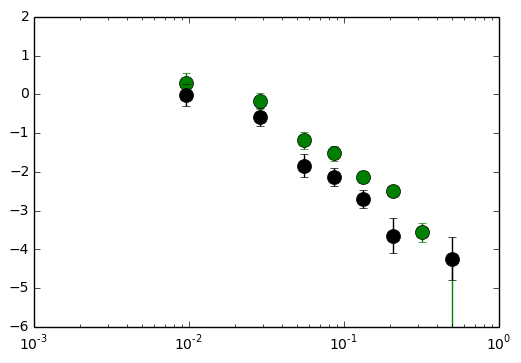

In [9]:
xscale('log'); ylim(-6,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="green")
errorbar(fqd, p2, yerr=p2e, fmt='o', ms=10, color="black")

In [10]:
Cx = clag.clag('cxd10r', [[t1,t2]], [[l1,l2]], [[l1e,l2e]], dt, fqL, p1, p2)
p  = np.concatenate( ((p1+p2)*0.5-0.3,p1*0+0.1) ) # a  good starting point generally
p, pe = clag.optimize(Cx, p)

   1 5.670e+03 9.675e+00 inf -- 2.919e+02 -- -0.156222 -0.68176 -1.81406 -2.12926 -2.71269 -3.36881 -6.08072 -6.42184 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
   3 1.047e+03 1.151e+01 2.879e+00 -- 2.948e+02 -- -0.118762 -0.639838 -1.76688 -2.08895 -2.66889 -3.26353 -5.78072 -6.12184 0.0424515 0.105123 0.138683 0.0948799 0.140121 0.0393153 2.81332 0.248074
   5 4.807e+02 1.352e+01 2.643e+00 -- 2.974e+02 -- -0.0866187 -0.605762 -1.72887 -2.05583 -2.63238 -3.19092 -6.08072 -5.82184 0.000648562 0.108523 0.164491 0.0915061 0.170413 0.00913963 2.85855 1.07978
   7 1.906e+02 1.570e+01 2.338e+00 -- 2.998e+02 -- -0.0590998 -0.577513 -1.69772 -2.02818 -2.60158 -3.1372 -6.38072 -5.52184 -0.0305296 0.110846 0.182461 0.0892265 0.194212 -0.00858619 2.71513 -3.11054
   9 5.891e+01 1.810e+01 2.317e+00 -- 3.021e+02 -- -0.0354896 -0.55376 -1.67186 -2.0048 -2.57534 -3.09575 -6.30939 -5.82184 -0.0543126 0.112411 0.195339 0.0877287 0.21341 -0.0199574 1.23313 2.11694
  11 5.912e+01 2.072e+01 2.113e+00 -- 3.042e+02 -

In [11]:
phi, phie = p[nfq:], pe[nfq:]
lag, lage = phi/(2*np.pi*fqd), phie/(2*np.pi*fqd)    
cx, cxe   = p[:nfq], pe[:nfq]

<Container object of 3 artists>

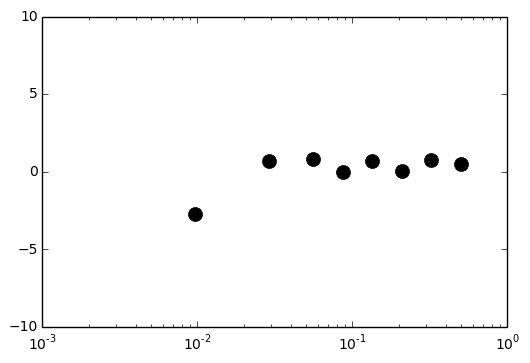

In [12]:


xscale('log'); ylim(-10,10)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")



(0.095117985155199827, 1.1056585227168947)

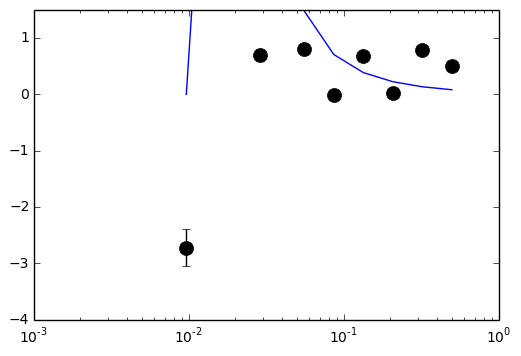

In [49]:
s, loc, scale = lognorm.fit(lag,loc=.01)
xscale('log'); ylim(-4,1.5)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")
#plot(fqd,norm.pdf(fqd,mu,sigma))
plot(fqd,lognorm.pdf(fqd,s,loc,scale))
mu,sigma



/usr/lib/python2.7/dist-packages/numpy/core/numeric.py:460: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


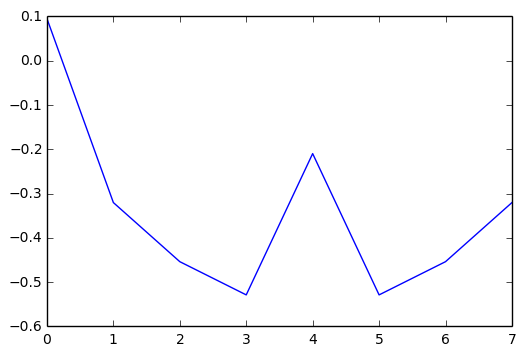

In [50]:
plot(ifft(lag))